# <a id='toc1_'></a>[Project](#toc0_)
Predicting price of a car using Linear Regression

**Table of contents**<a id='toc0_'></a>    
- [Project](#toc1_)    
- [Importing libraries](#toc2_)    
- [2.2 Data Preparation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Importing libraries](#toc0_)

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# <a id='toc3_'></a>[2.2 Data Preparation](#toc0_)

Dataset link = https://www.kaggle.com/datasets/CooperUnion/cardataset

In [5]:
data = pd.read_csv("car_price.csv")

In [6]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Fixing column names

In [7]:
data.columns = data.columns.str.lower().str.replace(" ","_")

There is inconsistency in data values as well. Some values are all caps and some are not


In [8]:
data.dtypes[data.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
string_cols = list(data.dtypes[data.dtypes == 'object'].index)

In [10]:
for col in string_cols:
    data[col] = data[col].str.lower().str.replace(" ","_")

data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 EDA

## 2.3.1 Missing Values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

## 2.3.2 Looking at all the values in each column

In [12]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(f"The nubmer of unqiue values in '{col}': {data[col].nunique()}")
    print("-------------------------")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
The nubmer of unqiue values in 'make': 48
-------------------------
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
The nubmer of unqiue values in 'model': 914
-------------------------
year
[2011 2012 2013 1992 1993]
The nubmer of unqiue values in 'year': 28
-------------------------
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
The nubmer of unqiue values in 'engine_fuel_type': 10
-------------------------
engine_hp
[335. 300. 230. 320. 172.]
The nubmer of unqiue values in 'engine_hp': 356
-------------------------
engine_cylinders
[ 6.  4.  5.  8. 12.]
The nubmer of unqiue values in 'engine_cylinders': 9
-------------------------
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
The nubmer of unqiue values in 'transmission_type': 5
-------------------------
driven_wheels
['rear_wheel_drive'

## 2.3.3 Distribution of Price (dependent variable)

MSRP column is right skewed - which means there are some cars that outliers with very high price

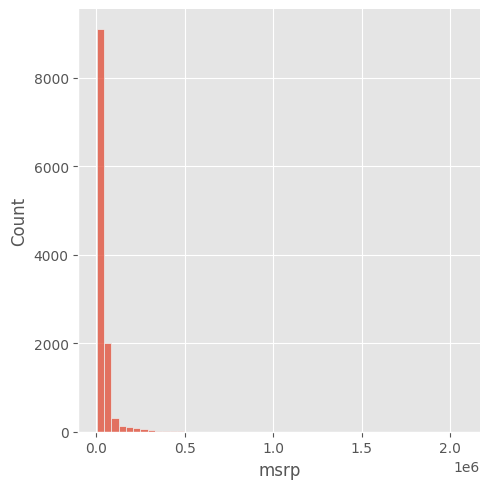

In [13]:
sns.displot(data['msrp'], bins = 50)

MSRP with car price < 500k

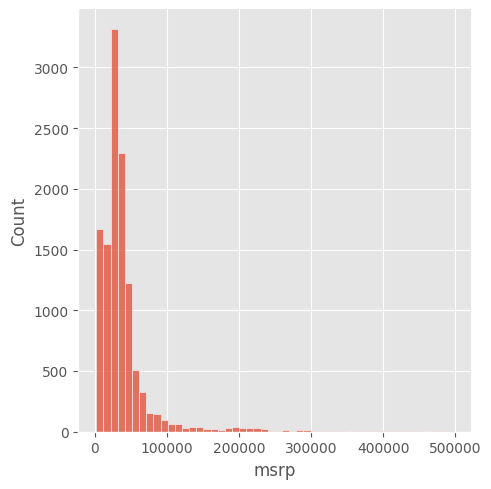

In [14]:
sns.displot(data['msrp'][data['msrp']<500000], bins = 50)

Price < 100k

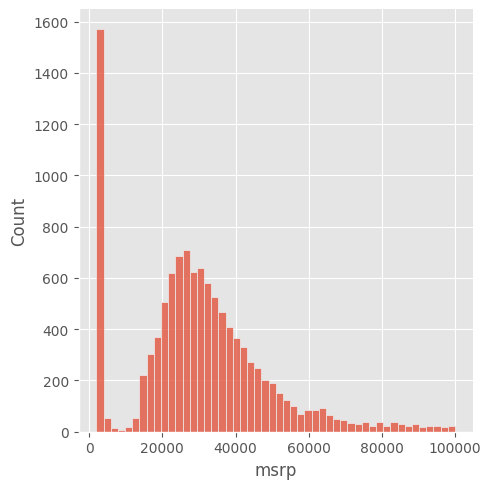

In [15]:
sns.displot(data['msrp'][data['msrp'] < 100000], bins = 50)

The cars are priced averaged at 35000. Alot of cars have price of 1000$ which might be the minimum price you can put on the platform

In [16]:
price_logs = np.log1p(data['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

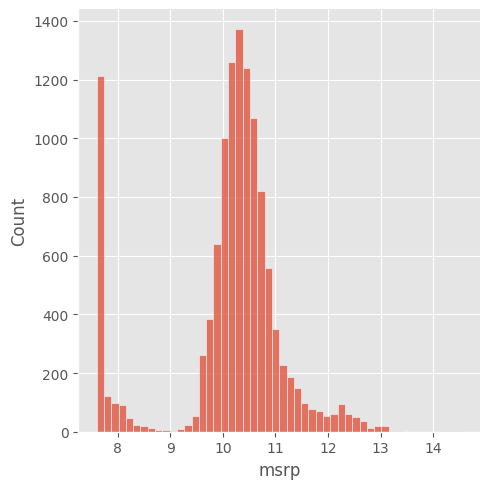

In [17]:
sns.displot(price_logs, bins = 50);


This looks more like normal ditribution

## 2.3.4 Looking at missing data

4 cols with missing values-

- engine_fuel_type 6 missing
- engine_hp 69 values
- Eengine_cylinders 30 missing
- market_category 3742 missing

In [18]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up validation framwork

60%, 20%, 20%

In [19]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test - n_val

n_val , n_test ,n_train


(2382, 2382, 7150)

In [20]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train : n_train + n_val]
df_test = data.iloc[n_val + n_val : ]

#### 2.4.2 Shuffling the records

In [21]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [22]:
np.random.shuffle(idx)
idx

array([ 1137, 10635,  2994, ...,  9570, 10366,  2827])

#### 2.4.3 Creating train, test and val df

In [23]:
df_train = data.iloc[idx[n_train:]]
df_val = data.iloc[idx[n_train : n_train + n_val]]
df_test = data.iloc[idx[n_val + n_train:]]

In [24]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df_val = df_val.reset_index()

#### 2.4.3 Log transform price

In [25]:
#log transforming our target variable
y_train = np.log1p(df_train.msrp.values) #.values to get np array and not pandas series
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#### 2.4.4 Removing msrp from our X


In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.5 Linear Regression

In [27]:
df_train.iloc[10]

index                                 4396
make                                  ford
model                             explorer
year                                  2015
engine_fuel_type          regular_unleaded
engine_hp                            365.0
engine_cylinders                       6.0
transmission_type                automatic
driven_wheels              all_wheel_drive
number_of_doors                        4.0
market_category      crossover,performance
vehicle_size                       midsize
vehicle_style                      4dr_suv
highway_mpg                             22
city_mpg                                16
popularity                            5657
Name: 10, dtype: object

In [28]:
#engine hp , city mpg, popularity

xi = [153,30,1385]

In [29]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [30]:
# g(x) -> y

#Linear regression function

def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

linear_regression(xi)

12.669999999999998

In [31]:
np.expm1(12.6699) #-1 since we did +1 inside log1p

318028.6829448396

# 2.6 Linear Regression Vector form

In [32]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [33]:
# g(x) -> y
#Linear regression function

def linear_regression(xi):
    return w0 + dot(xi, w)
    

In [34]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [35]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [36]:
linear_regression(xi)

12.669999999999998

In [37]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [38]:
def linear_regression(X):
    return X.dot(w_new)

In [39]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.7 Training a linear regression model

In [40]:
def train_linear_regression(X, y):
    pass

In [41]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [42]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [44]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [45]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [46]:
w0 = w_full[0]
w = w_full[1:]

In [47]:
w0, w

(25844.754055766785, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [48]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [49]:
train_linear_regression(X, y)

(8.127577566616782e+20,
 array([-8.12757757e+20,  2.60091371e+01,  7.02526108e+00, -4.63612378e+00]))

# 2.8 Car price baseline model

In [50]:
df_train.columns

Index(['index', 'make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [51]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg','popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,184.0,4.0,35,26,586
1,155.0,6.0,26,18,155
2,305.0,6.0,24,17,1385
3,108.0,4.0,38,30,2031
4,155.0,4.0,26,21,481
...,...,...,...,...,...
4759,74.0,4.0,36,27,210
4760,109.0,4.0,39,31,2009
4761,355.0,8.0,23,16,1385
4762,200.0,6.0,21,15,155


In [52]:
X_train = df_train[base].values

In [53]:
X_train = df_train[base].fillna(0).values

In [54]:
w0, w = train_linear_regression(X_train,y_train)

In [55]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot: ylabel='Count'>

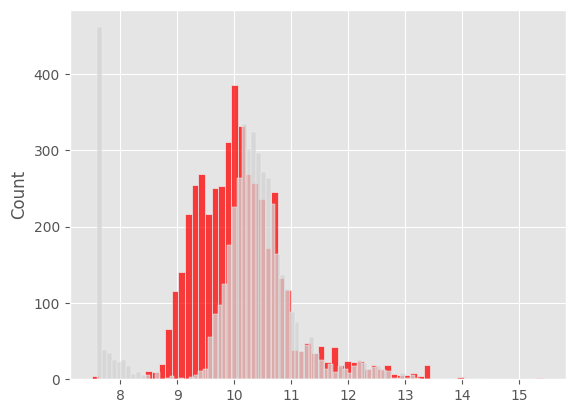

In [56]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_train, color ='lightgray')

# 2.9 RMSE

In [57]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error **2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse

In [58]:
rmse(y_train, y_pred)

0.7470119623735134

# 2.10 Validating the model

In [59]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)

In [60]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X


In [61]:
#training
X_train = prepare_X(df_train)

In [62]:
w0, w = train_linear_regression(X_train, y_train)

In [64]:
#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


0.7490684961556079

# 2.11 Feature Engineering

In [91]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [95]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.519449400865735
val 0.5171855391595883


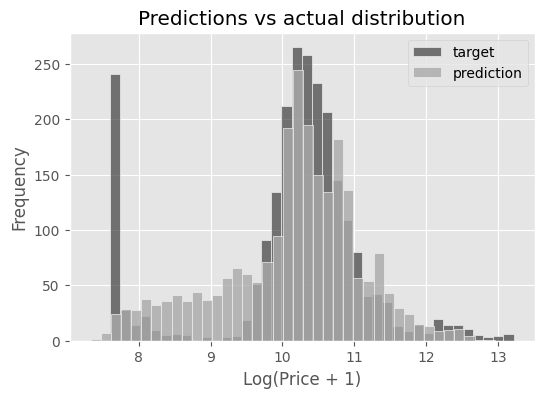

In [96]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# 2.12 Categorical variables